In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
import sys
sys.path.append('../code/')
from utils import run_rc_sim, linear_scale_forward, get_dataset_psd


In [5]:
tstop = 80
dt = 0.5
t_vec = np.linspace(0, tstop, np.round(tstop/dt).astype(int))
pulse_flat = np.zeros(t_vec.shape[0])

i1_start = 30
pulse_width = 10

theta_ranges = [('amp1', (0, 1), linear_scale_forward),
                ('amp2', (-1, 0), linear_scale_forward), 
                ('latency', (-20, 20), linear_scale_forward)]

n_params = 3
prior_dict = {key: value for (key, value, _) in theta_ranges[:n_params]}
scale_func_list = [scale_func for (_, _, scale_func) in theta_ranges[:n_params]]

def sim_func(theta_sample):
    theta_dict = {param_name: scale_func_list[idx](theta_sample[idx], bounds) for 
                  idx, (param_name, bounds) in enumerate(prior_dict.items())}
    return run_rc_sim(theta_dict), theta_dict.values()

In [6]:
theta1 = np.array([0.6, 0.75, 0.8])
theta2 = np.array([0.2, 0.4, 0.8])
res1, _ = sim_func(theta1)
res2, _ = sim_func(theta2)

res = np.hstack([res1, res2]).T

upper = 0.1
noise = np.random.random(res.shape) * upper - (upper / 2)
#res = res + noise

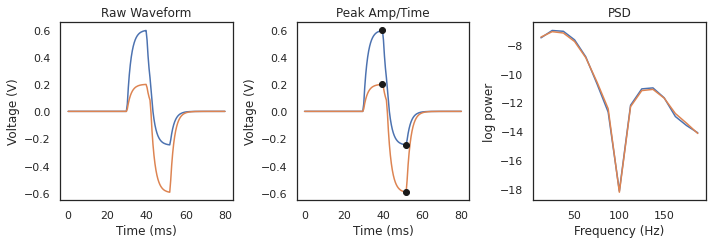

In [27]:
%matplotlib inline
dt = 0.5 # Sampling interval used for simulation
fs = (1/dt) * 1e3
dpl_spectra1, f = get_dataset_psd(res, fs=fs)

plt.figure(figsize=(10,3.5))
plt.subplot(1,3,1)
plt.plot(t_vec, res.T)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Raw Waveform')

plt.subplot(1,3,2)
plt.scatter(t_vec[np.argmax(res,axis=1)], np.max(res,axis=1), color='k', zorder=10)
plt.scatter(t_vec[np.argmin(res,axis=1)], np.min(res,axis=1), color='k', zorder=10)
plt.plot(t_vec, res.T)

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Peak Amp/Time')

plt.subplot(1,3,3)
_ = plt.plot(f, dpl_spectra1.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('log power')
plt.title('PSD')

plt.tight_layout()